In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('tatadata.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.738639,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.738639,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.738639,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.199647,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.199647,0.0


In [49]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8390,2024-03-01,958.950012,980.400024,956.700012,977.400024,977.400024,10645369.0
8391,2024-03-04,993.250000,995.000000,980.099976,987.200012,987.200012,6084495.0
8392,2024-03-05,1027.000000,1065.599976,1005.349976,1021.900024,1021.900024,59811033.0
8393,2024-03-06,1025.000000,1030.650024,1009.000000,1017.650024,1017.650024,14214823.0
8394,2024-03-07,1025.000000,1047.000000,1014.049988,1039.300049,1039.300049,16877082.0


In [50]:
df1 = df['Close'].fillna(method='bfill')

<ipython-input-50-93e6dbdfc62f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df['Close'].fillna(method='bfill')


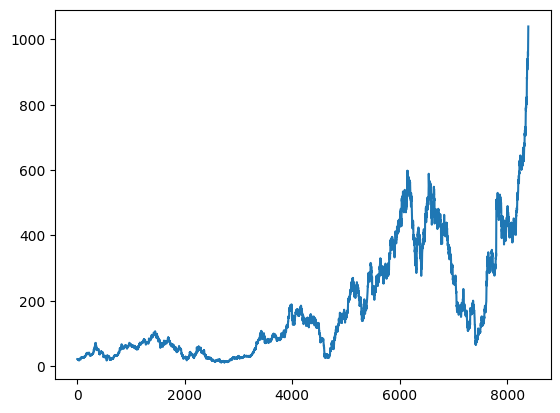

In [51]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
print(df1)

[[0.01030122]
 [0.01030122]
 [0.01030122]
 ...
 [0.98307444]
 [0.97894032]
 [1.        ]]


In [54]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:
training_size,test_size

(5456, 2939)

In [56]:
train_data

array([[0.01030122],
       [0.01030122],
       [0.01030122],
       ...,
       [0.26144936],
       [0.26448093],
       [0.2674644 ]])

In [57]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
print(X_train), print(y_train.shape)

[[[0.01030122]
  [0.01030122]
  [0.01030122]
  ...
  [0.01539824]
  [0.01539824]
  [0.01583513]]

 [[0.01030122]
  [0.01030122]
  [0.00957307]
  ...
  [0.01539824]
  [0.01583513]
  [0.01583513]]

 [[0.01030122]
  [0.00957307]
  [0.00957307]
  ...
  [0.01583513]
  [0.01583513]
  [0.01539824]]

 ...

 [[0.16448661]
  [0.15760538]
  [0.1529377 ]
  ...
  [0.25971701]
  [0.2571185 ]
  [0.25427941]]

 [[0.15760538]
  [0.1529377 ]
  [0.14451661]
  ...
  [0.2571185 ]
  [0.25427941]
  [0.26212304]]

 [[0.1529377 ]
  [0.14451661]
  [0.15500688]
  ...
  [0.25427941]
  [0.26212304]
  [0.26144936]]]
(5355,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(2838, 100)
(2838,)


(None, None)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - loss: 0.0013 - val_loss: 8.4557e-04
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 5.1949e-05 - val_loss: 9.4691e-04
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - loss: 4.2896e-05 - val_loss: 5.8086e-04
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - loss: 4.0065e-05 - val_loss: 5.2824e-04
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - loss: 3.5062e-05 - val_loss: 6.9046e-04
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 4.0847e-05 - val_loss: 4.4341e-04
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - loss: 3.3586e-05 - val_loss: 4.4182e-04
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 194ms/step - loss: 3.0128e-05 - val_loss: 5.7628e-04
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - loss: 3.2997e-05 - val_loss: 3.4919e-04
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - loss: 3.1241e-05 - val_loss: 7.7661e-04


In [66]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

168/168 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [67]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [68]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

94.25164967460108

In [69]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

379.1903147113114

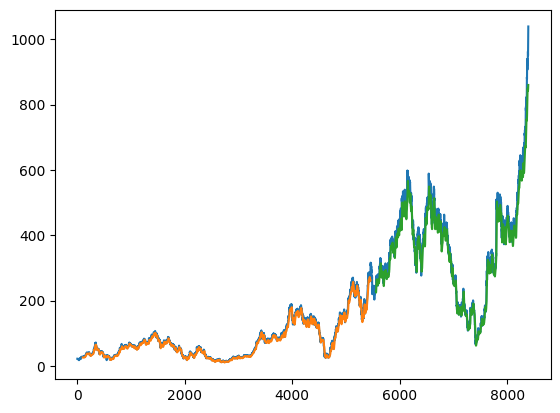

In [71]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [111]:
len(test_data)

2939

In [102]:
x_input=test_data[2839:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [107]:
temp_input

[0.6086211611451809,
 0.637949002121208,
 0.6370735781546604,
 0.6268598899974114,
 0.6393108505544142,
 0.6396026585432634,
 0.6341553815383035,
 0.6187375410635253,
 0.6094965851117286,
 0.5985047228629042,
 0.6126093398419624,
 0.6004015623363227,
 0.6005474955127135,
 0.5996233882447474,
 0.6081347950424548,
 0.6188834742399161,
 0.6174730008692239,
 0.6164516437262854,
 0.6140684381501408,
 0.6206830054744299,
 0.6223366618964853,
 0.6244766844212668,
 0.6422776721082571,
 0.6508863871448693,
 0.65200499416278,
 0.6449526856732509,
 0.6521509273391708,
 0.6516645612364447,
 0.6504486459796293,
 0.6443690696955525,
 0.6675200845125304,
 0.681965134417924,
 0.6761774244866288,
 0.6752533172186626,
 0.675399192031121,
 0.6786578799377456,
 0.6917897647113515,
 0.6913033986086253,
 0.6841051569427055,
 0.6901847332267822,
 0.6849320143356994,
 0.6896983671240561,
 0.6891633760838438,
 0.7014684618283882,
 0.6999120552813051,
 0.6981125240467914,
 0.6750587591047856,
 0.678560571698841

In [97]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[[0.8441659808158875], [0.8496254086494446], [0.8488855957984924], [0.8422340750694275], [0.8307501077651978], [0.8156935572624207], [0.7981997728347778], [0.7791625261306763], [0.7592286467552185], [0.7388371229171753], [0.7182753682136536], [0.6977271437644958], [0.6773166656494141], [0.6571311354637146], [0.6372427940368652], [0.6177144050598145], [0.5986049175262451], [0.5799703598022461], [0.5618618726730347], [0.5443251132965088], [0.5273999571800232], [0.5111181735992432], [0.4955041706562042], [0.48057448863983154], [0.46633750200271606], [0.4527951180934906], [0.4399425685405731], [0.42776963114738464], [0.41626036167144775], [0.40539589524269104]]


In [98]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [99]:
import matplotlib.pyplot as plt

In [100]:
len(df1)

8395

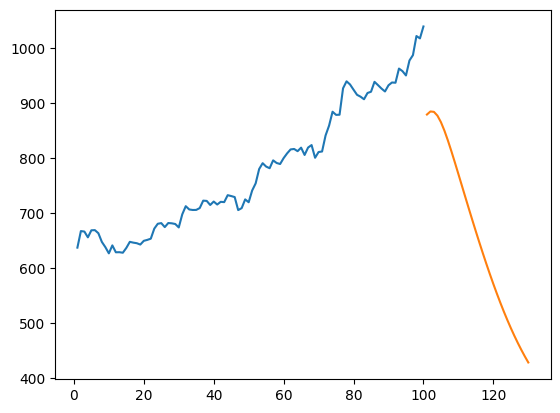

In [101]:
plt.plot(day_new,scaler.inverse_transform(df1[8295:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

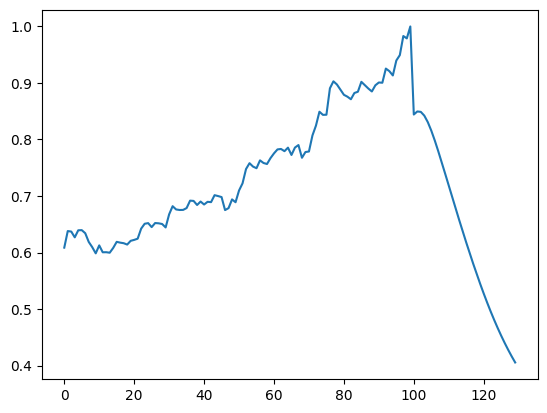

In [112]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[8295:])